In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

### The dataset’s  positive class (1) consists of component failures for a specific component of the APS system.

### The The dataset’s negative class (0) consists of trucks with failures for components not related to the APS.

### 1.	Develop strategies, incorporating basic programming skills (input / output and basic data structures) for identifying and handling missing and out-of-range data

In [2]:
df=pd.read_csv("aps_failure_set.csv")
df.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [3]:
df.tail(5) 

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [4]:
df.shape

(60000, 171)

In [5]:
df.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,NaN,30,2062,1887,334,419,155,618,2423,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,NaN,na,0,na,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,NaN,46329,8752,14861,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,NaN,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [7]:
df2 = df.drop_duplicates()

In [8]:
df2.shape

(60000, 171)

In [9]:
df2.count()

class     60000
aa_000    60000
ab_000    60000
ac_000    60000
ad_000    60000
          ...  
ee_007    60000
ee_008    60000
ee_009    60000
ef_000    60000
eg_000    60000
Length: 171, dtype: int64

In [10]:
df2.isnull().any().value_counts()

False    171
dtype: int64

In [11]:
df2.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [12]:
df2.isnull().any().head(5)

class     False
aa_000    False
ab_000    False
ac_000    False
ad_000    False
dtype: bool

In [13]:
df2.isnull().any().tail(5)

ee_007    False
ee_008    False
ee_009    False
ef_000    False
eg_000    False
dtype: bool

In [14]:
df3 = df2.dropna() 
df3.count()

class     60000
aa_000    60000
ab_000    60000
ac_000    60000
ad_000    60000
          ...  
ee_007    60000
ee_008    60000
ee_009    60000
ef_000    60000
eg_000    60000
Length: 171, dtype: int64

In [15]:
df3.shape

(60000, 171)

In [16]:
df3.isnull().any().head(25)

class     False
aa_000    False
ab_000    False
ac_000    False
ad_000    False
ae_000    False
af_000    False
ag_000    False
ag_001    False
ag_002    False
ag_003    False
ag_004    False
ag_005    False
ag_006    False
ag_007    False
ag_008    False
ag_009    False
ah_000    False
ai_000    False
aj_000    False
ak_000    False
al_000    False
am_0      False
an_000    False
ao_000    False
dtype: bool

In [17]:
df4 = df3.rename(columns={"class": "classification"})

In [18]:
df4['classification'] = df4.classification.map({'neg':0, 'pos':1})
df5 = df4.replace(['na'],[np.NaN])

In [19]:
df5.isnull().any().head(25)

classification    False
aa_000            False
ab_000             True
ac_000             True
ad_000             True
ae_000             True
af_000             True
ag_000             True
ag_001             True
ag_002             True
ag_003             True
ag_004             True
ag_005             True
ag_006             True
ag_007             True
ag_008             True
ag_009             True
ah_000             True
ai_000             True
aj_000             True
ak_000             True
al_000             True
am_0               True
an_000             True
ao_000             True
dtype: bool

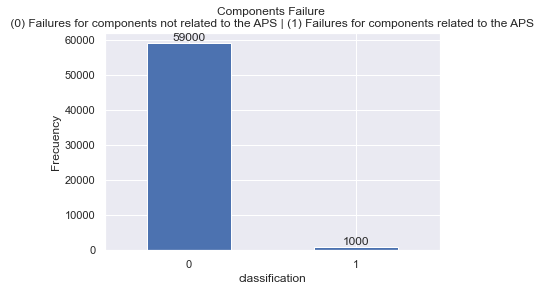

In [20]:
Count = pd.value_counts(df5['classification'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Components Failure \n (0) Failures for components not related to the APS | (1) Failures for components related to the APS ")
plt.xlabel("classification")
plt.ylabel("Frecuency")

for index, value in enumerate(Count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=360)
plt.show()

In [21]:
df5['classification'].value_counts()

0    59000
1     1000
Name: classification, dtype: int64

In [22]:
print("Percentage of Scania trucks with failures for components not related to the APS \n", (df5[df5['classification']== 0].shape[0] / df5.shape[0]) * 100)
print("Percentage of Scania trucks with failures for components related to the APS \n", (df5[df5['classification']== 1].shape[0] / df5.shape[0]) * 100)

Percentage of Scania trucks with failures for components not related to the APS 
 98.33333333333333
Percentage of Scania trucks with failures for components related to the APS 
 1.6666666666666667


In [23]:
df5.describe(include='all')

,classification,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,13671,56665,45139,57500,57500,59329,59329,59329,...,59329,59329,59329,59329,59329,59329,59329,59329,57276,57277
unique,NaN,NaN,29,2061,1886,333,418,154,617,2422,...,34488,31711,35188,36288,31795,30469,24213,9724,28,49
top,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,NaN,NaN,10977,8752,2009,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,0.016667,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.128020,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


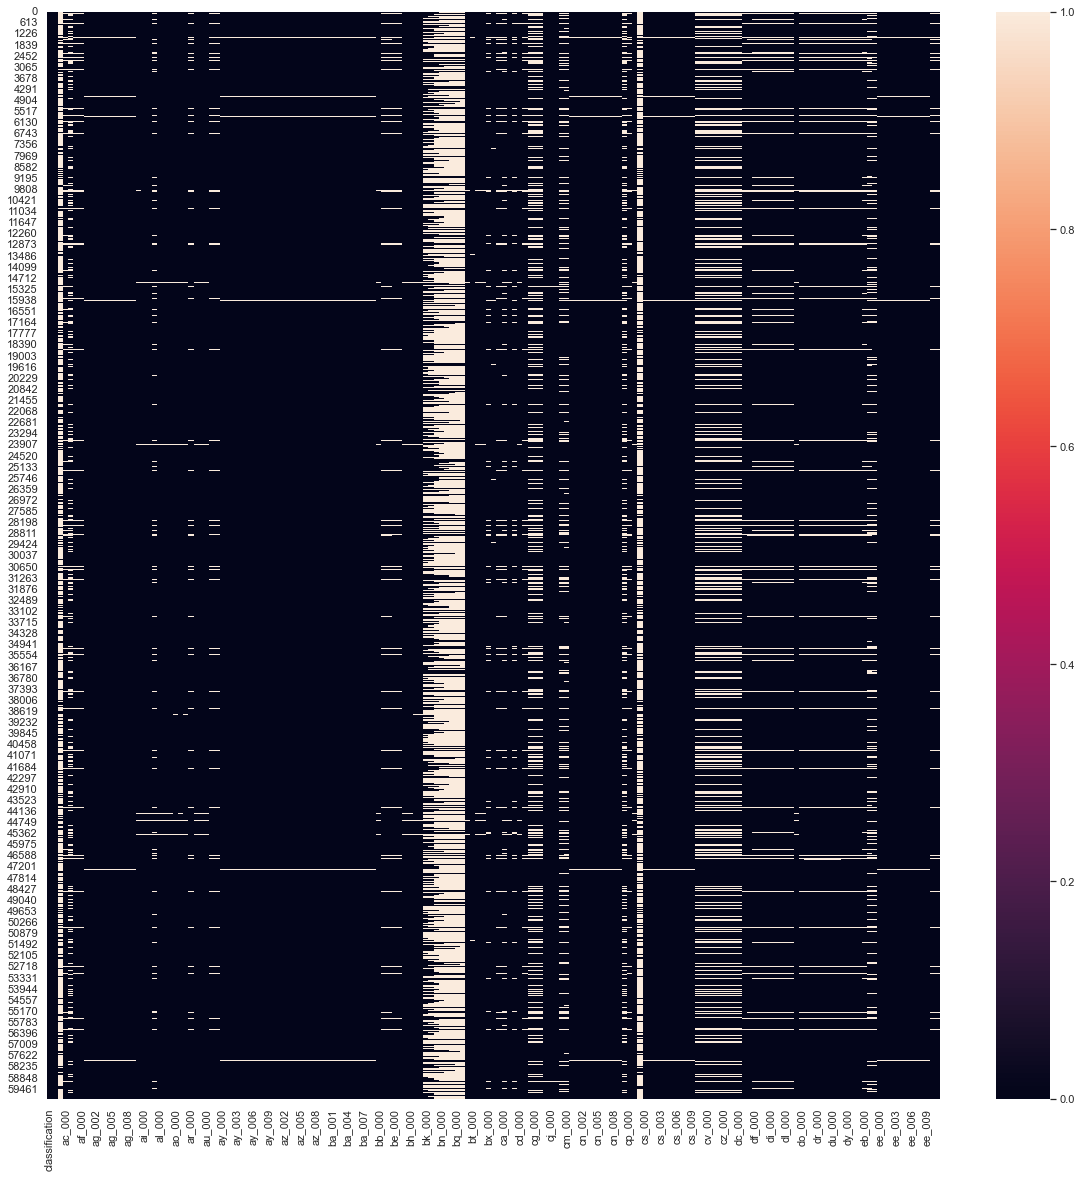

In [24]:
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(df5.isnull())
plt.show(plot)

C:\Users\eduma\AppData\Local\Temp/ipykernel_9604/1943607094.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs()))


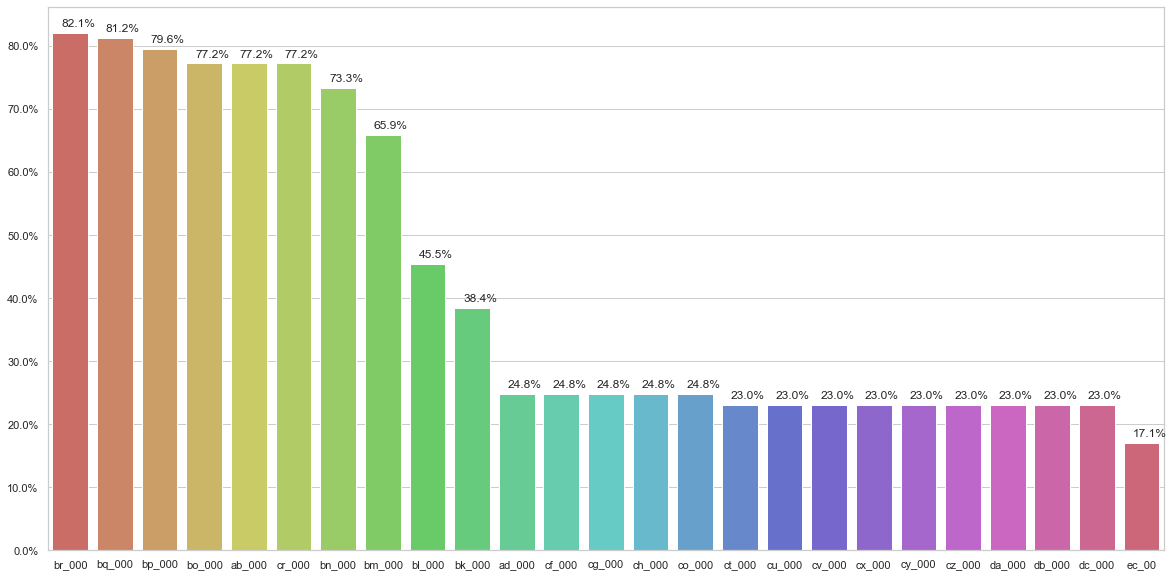

In [25]:
missing_vals={}
for i in df5.columns:
    null_percentage = df5[i].isnull().sum()/len(df)*100
    if null_percentage>0:
        missing_vals[i]=null_percentage

missing_vals = sorted(missing_vals.items(), key=lambda x: x[1],reverse=True)

sns.set_style(style="whitegrid")
plt.figure(figsize=(20,10))

# Bar Plot
plot = sns.barplot(x=[items[0] for items in missing_vals][:25],y = [items[1] for items in missing_vals][:25],palette="hls")

# Add annotations above each bar signifying their value
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

### 2.	Programmatically implement graphical methods to identify issues within a data set (missing, out of range, dirty data)

### 3.	Perform a critical analysis of a data set to optimise the data for a given problem space. Document the rationale behind the decisions to peers and stakeholders.

## Minimum Requirements

### Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc. and what these Characterisation mean. 

### Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.

### Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it. 

### Explain in your own words what the “Curse of Dimensionality ” is and how it may affect your analysis going forward.  

### References

### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

### https://seaborn.pydata.org/generated/seaborn.heatmap.html